<a href="https://colab.research.google.com/github/manekgarg/Network-analysis-Corona/blob/master/Covid19_Network_Analysis_Level_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Get Started

In [0]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
#from utils.pos import pos
from IPython.display import Image 

In [5]:
# Create an empty graph
G = nx.Graph()
# Import the dataset as a dataframe
df = pd.read_csv('/content/edgelist.csv')
# Check the dimension of the data set
print(df.shape)
df

(174, 2)


,Source,Target
0,George Keith,Robert Barclay
1,George Keith,Benjamin Furly
2,George Keith,Anne Conway Viscountess Conway and Killultagh
3,George Keith,Franciscus Mercurius van Helmont
4,George Keith,William Penn
...,...,...
169,Thomas Curtis,William Simpson
170,Thomas Curtis,John Story
171,Alexander Parker,Sir Charles Wager
172,John Story,Thomas Ellwood


In [6]:
G = nx.from_pandas_edgelist(df,
                             source='Source',
                             target='Target',
                             create_using=nx.Graph()
                            )
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 119
Number of edges: 174
Average degree:   2.9244


In [7]:
# Check the closeness of the network
nx.average_clustering(G)

0.22689383308513314

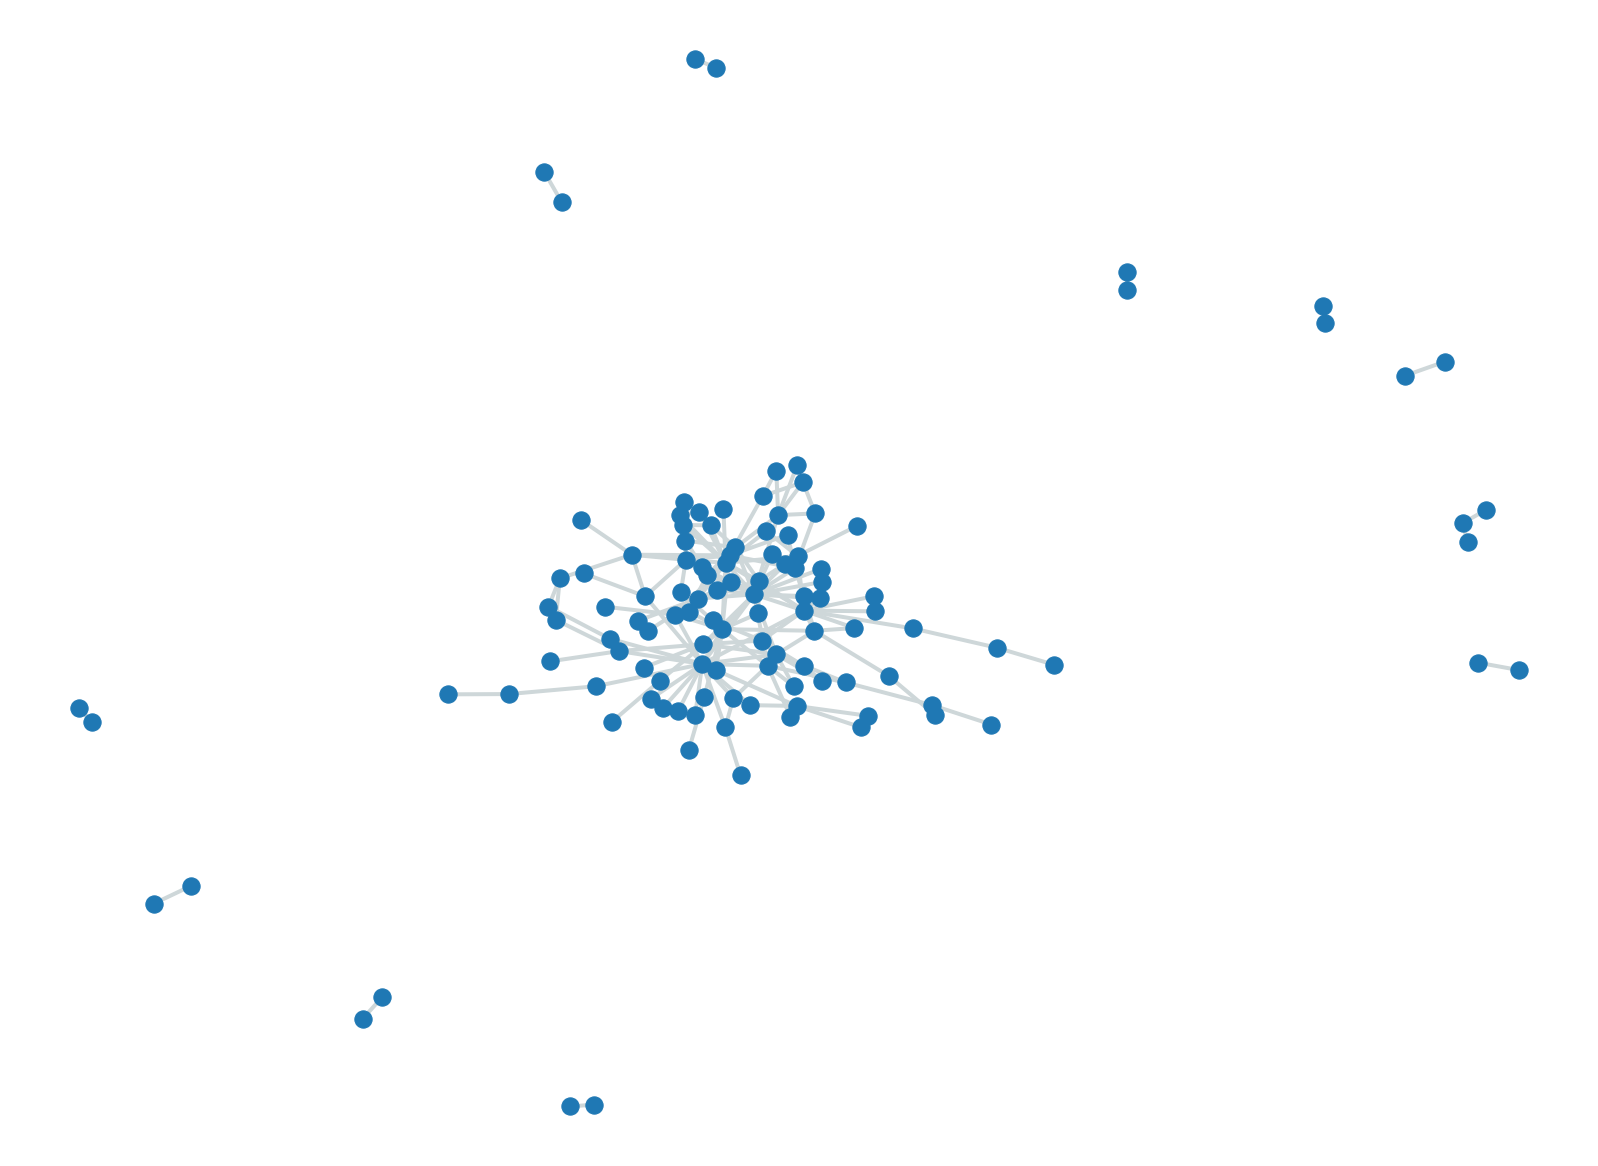

In [8]:
# Plot the basic graph
#pos=nx.rescale_layout(G)
plt.figure(figsize=(22,16))
nx.draw(G, edge_color = '#ced7d9',width = 4, arrowsize = 30)

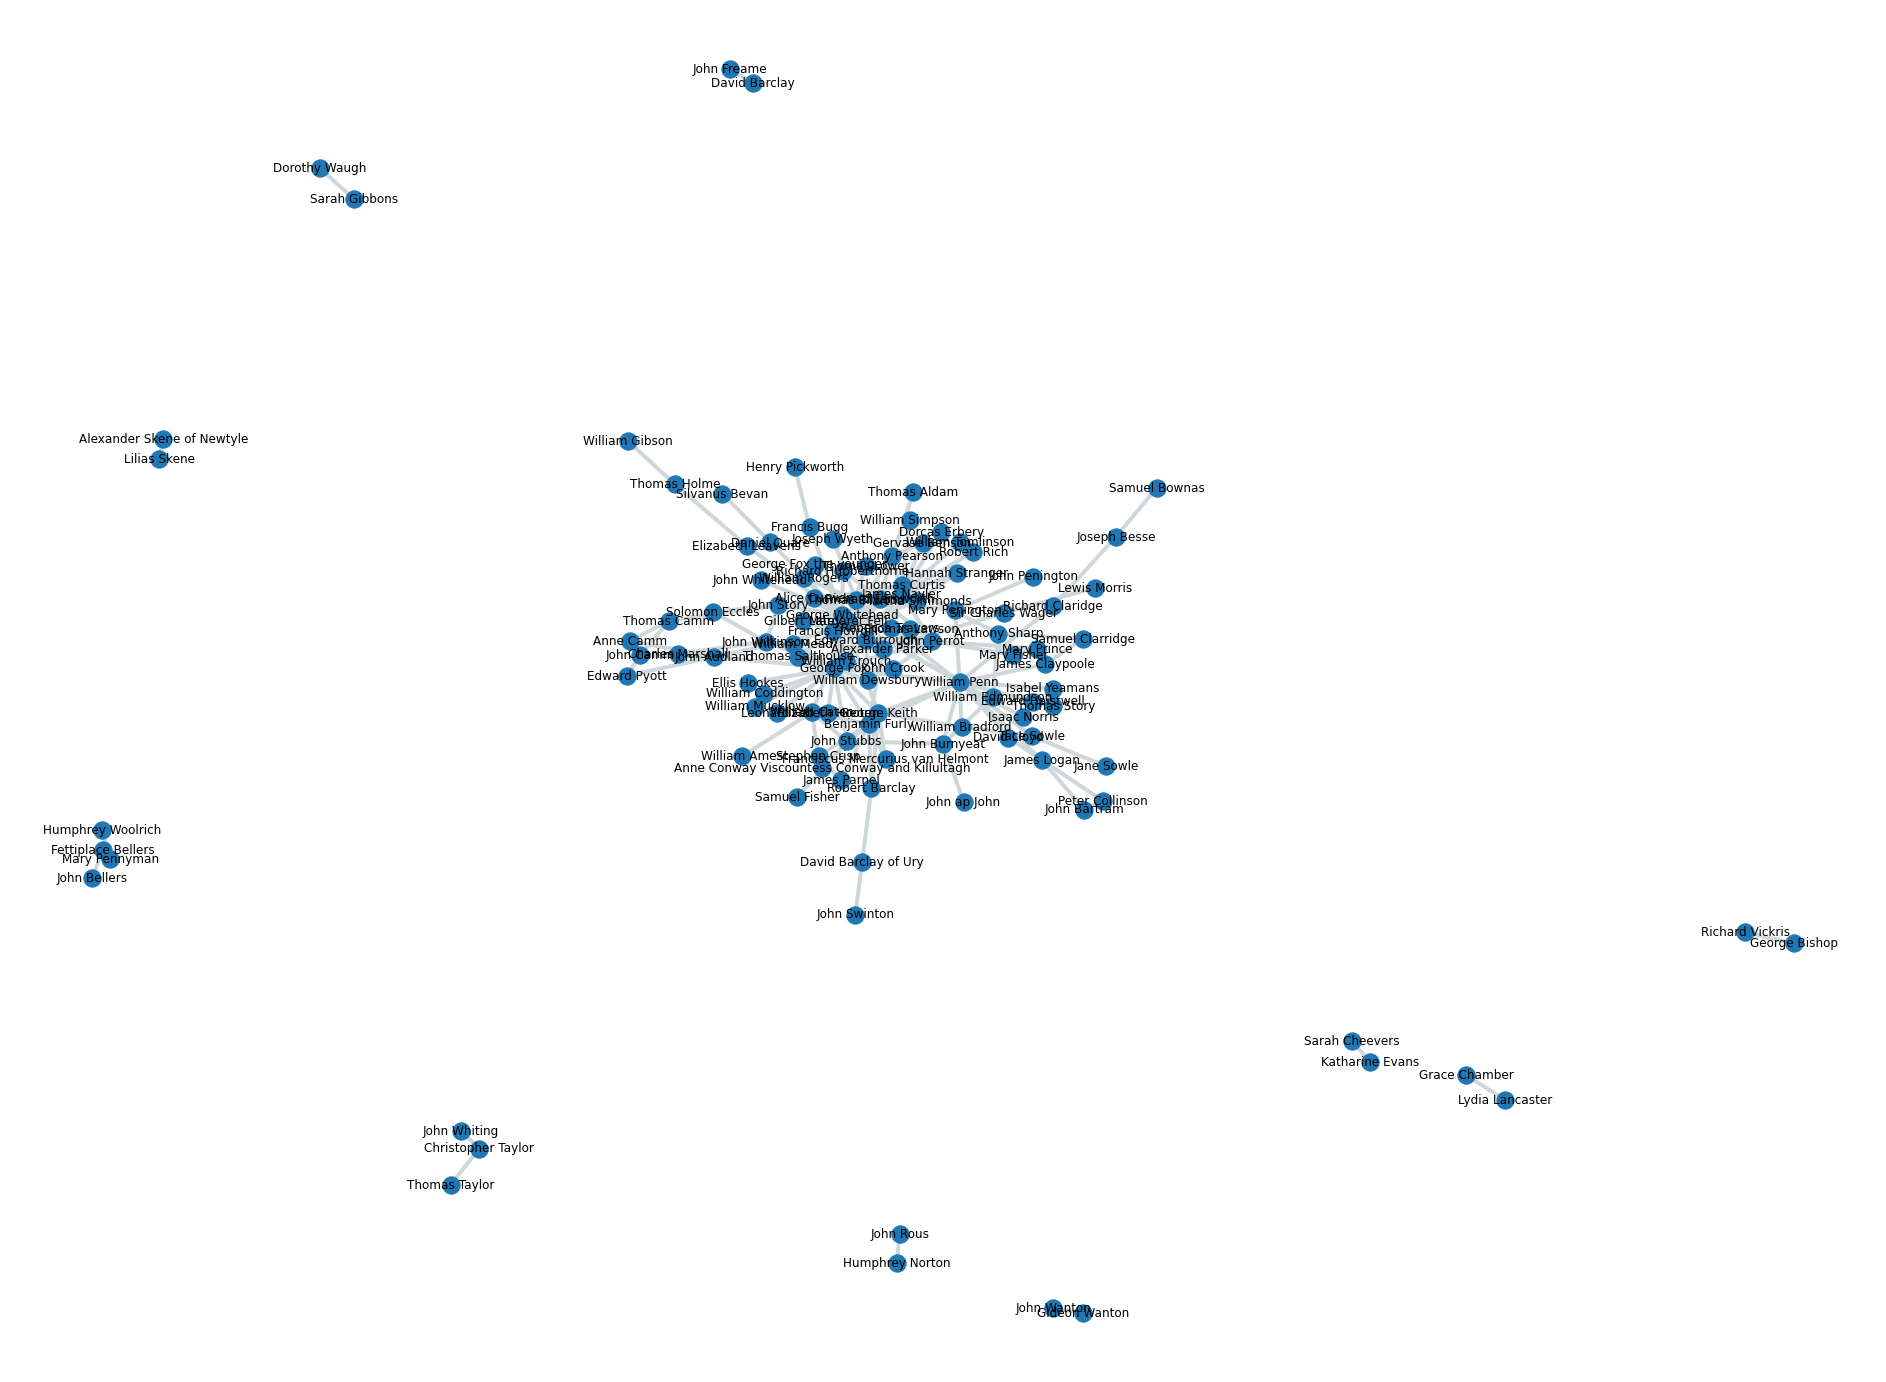

In [13]:
# Add information of people 
plt.figure(figsize=(26,19))
nx.draw(G, edge_color = '#ced7d9',width = 4, arrowsize = 30, with_labels= True)

## Try to detect the communities in this network
Tight knight group which are weekly connected to each other 

In [0]:
import community
from importlib import reload
# reload(community)
# or use Girvan-Newman algorithm
communities = community.best_partition(G.to_undirected(), resolution = .75)
c_values = [communities.get(node) for node in G.nodes()]

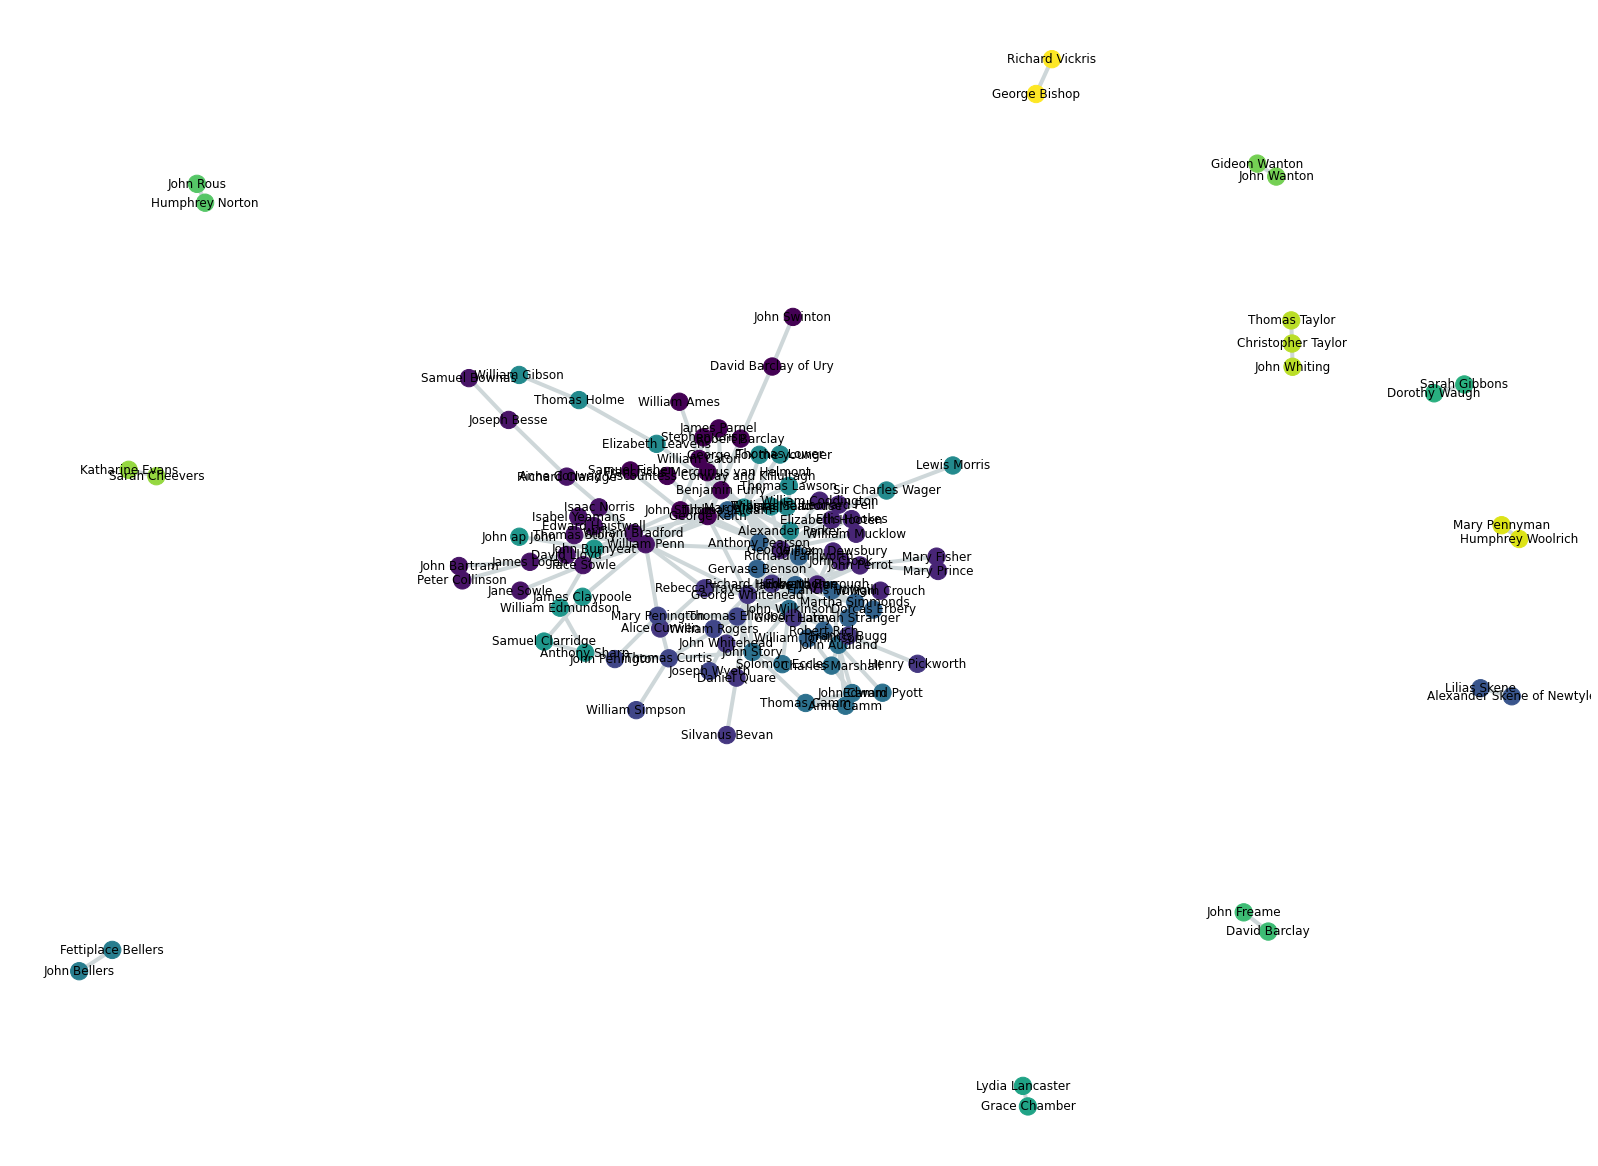

In [0]:
# Plot the the graph again with community
plt.figure(figsize=(22,16))
nx.draw(G, edge_color = '#ced7d9',width = 4, arrowsize = 30, node_color = c_values,  with_labels= True)

Even it's so intertangled, now it is bit distinctive with color coding

## Who are the high risk people 

In [0]:
# One way to see is to see the degree distribtion of the graph
my_degrees = G.degree()
print(my_degrees)

[('George Keith', 8), ('Robert Barclay', 3), ('Benjamin Furly', 10), ('Anne Conway Viscountess Conway and Killultagh', 1), ('Franciscus Mercurius van Helmont', 2), ('William Penn', 18), ('George Fox', 22), ('George Whitehead', 13), ('William Bradford', 3), ('James Parnel', 2), ('Stephen Crisp', 3), ('Peter Collinson', 2), ('John Bartram', 2), ('James Logan', 4), ('Joseph Wyeth', 1), ('Thomas Ellwood', 8), ('Alexander Skene of Newtyle', 1), ('Lilias Skene', 1), ('Dorcas Erbery', 1), ('James Nayler', 16), ('William Mucklow', 1), ('William Dewsbury', 3), ('Edward Burrough', 9), ('John Crook', 4), ('John Audland', 6), ('John Camm', 4), ('Francis Howgill', 7), ('Edward Pyott', 2), ('Charles Marshall', 3), ('Anne Camm', 2), ('Martha Simmonds', 3), ('Richard Farnworth', 6), ('William Crouch', 2), ('Tace Sowle', 3), ('John Bellers', 1), ('Fettiplace Bellers', 1), ('William Rogers', 2), ('Hannah Stranger', 2), ('Isabel Yeamans', 1), ('George Fox the younger', 1), ('Margaret Fell', 13), ('Ellis 

### 1. Between Centrality

In [0]:
bc = nx.centrality.betweenness.betweenness_centrality(G)
bc

{'Alexander Parker': 0.03893676140525336,
 'Alexander Skene of Newtyle': 0.0,
 'Alice Curwen': 0.0,
 'Anne Camm': 0.0008462504225216088,
 'Anne Conway Viscountess Conway and Killultagh': 0.0,
 'Anthony Pearson': 0.015228023702599973,
 'Anthony Sharp': 0.004321964915185254,
 'Benjamin Furly': 0.06419626175167245,
 'Charles Marshall': 0.001404496319750557,
 'Christopher Taylor': 0.00014486455164421265,
 'Daniel Quare': 0.013617267854555989,
 'David Barclay': 0.0,
 'David Barclay of Ury': 0.013617267854555989,
 'David Lloyd': 0.0,
 'Dorcas Erbery': 0.0,
 'Dorothy Waugh': 0.0,
 'Edward Burrough': 0.015338670858010271,
 'Edward Haistwell': 0.0,
 'Edward Pyott': 0.0,
 'Elizabeth Hooten': 0.0,
 'Elizabeth Leavens': 0.026944806605823553,
 'Ellis Hookes': 0.0,
 'Fettiplace Bellers': 0.0,
 'Francis Bugg': 0.013617267854555989,
 'Francis Howgill': 0.014689610452322309,
 'Franciscus Mercurius van Helmont': 0.0,
 'George Bishop': 0.0,
 'George Fox': 0.23683257726065213,
 'George Fox the younger': 0

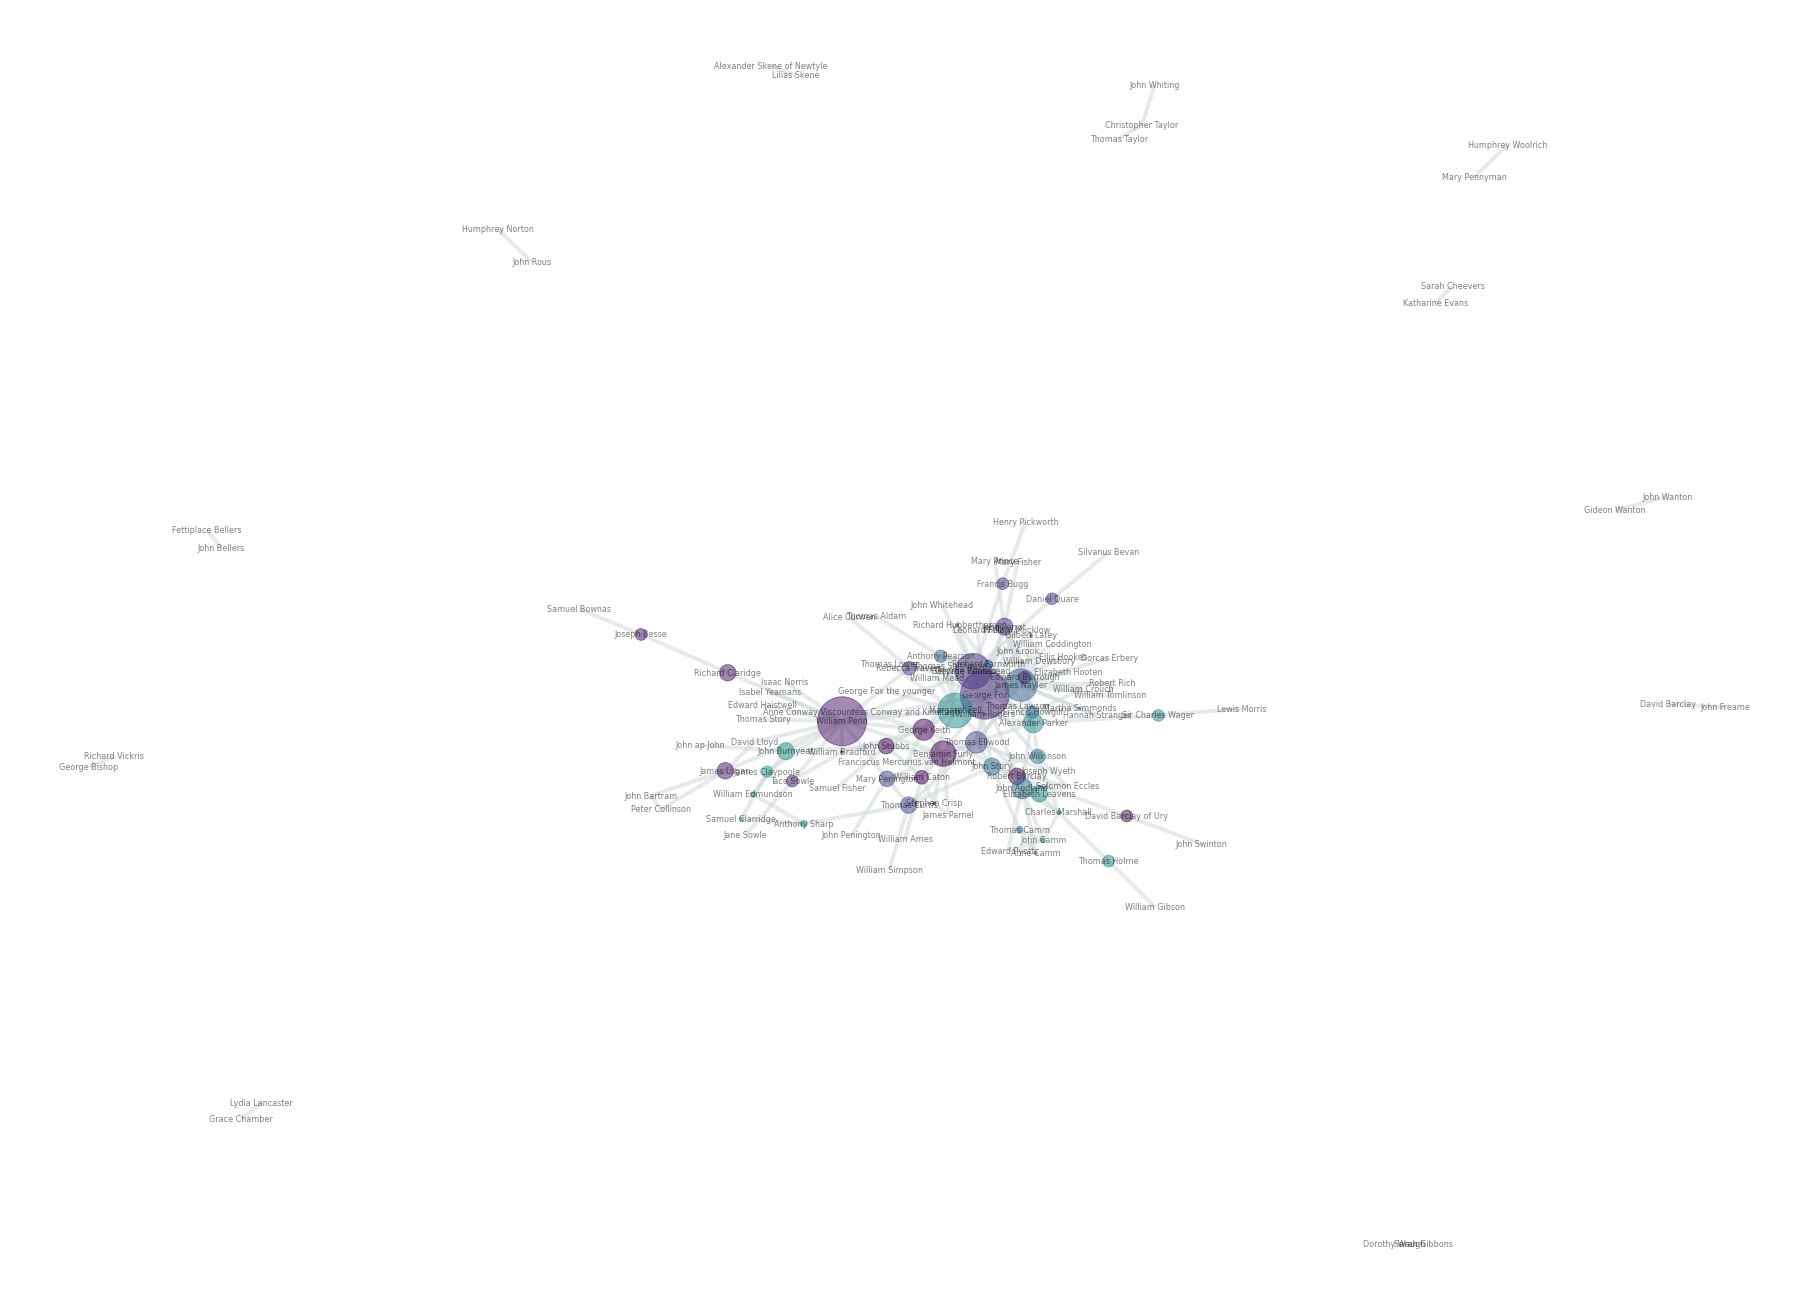

In [0]:
# Plot the the graph again with the Between Centrality
plt.figure(figsize=(25,18))
nx.draw(G, edge_color = '#ced7d9',width = 4, arrowsize = 30, node_color = c_values, font_size =8, 
        alpha = .5, with_labels= True, node_size = [10000*bc[n] for n in G.nodes()])

### 2.Page Rank

In [0]:
pr = nx.pagerank(G)

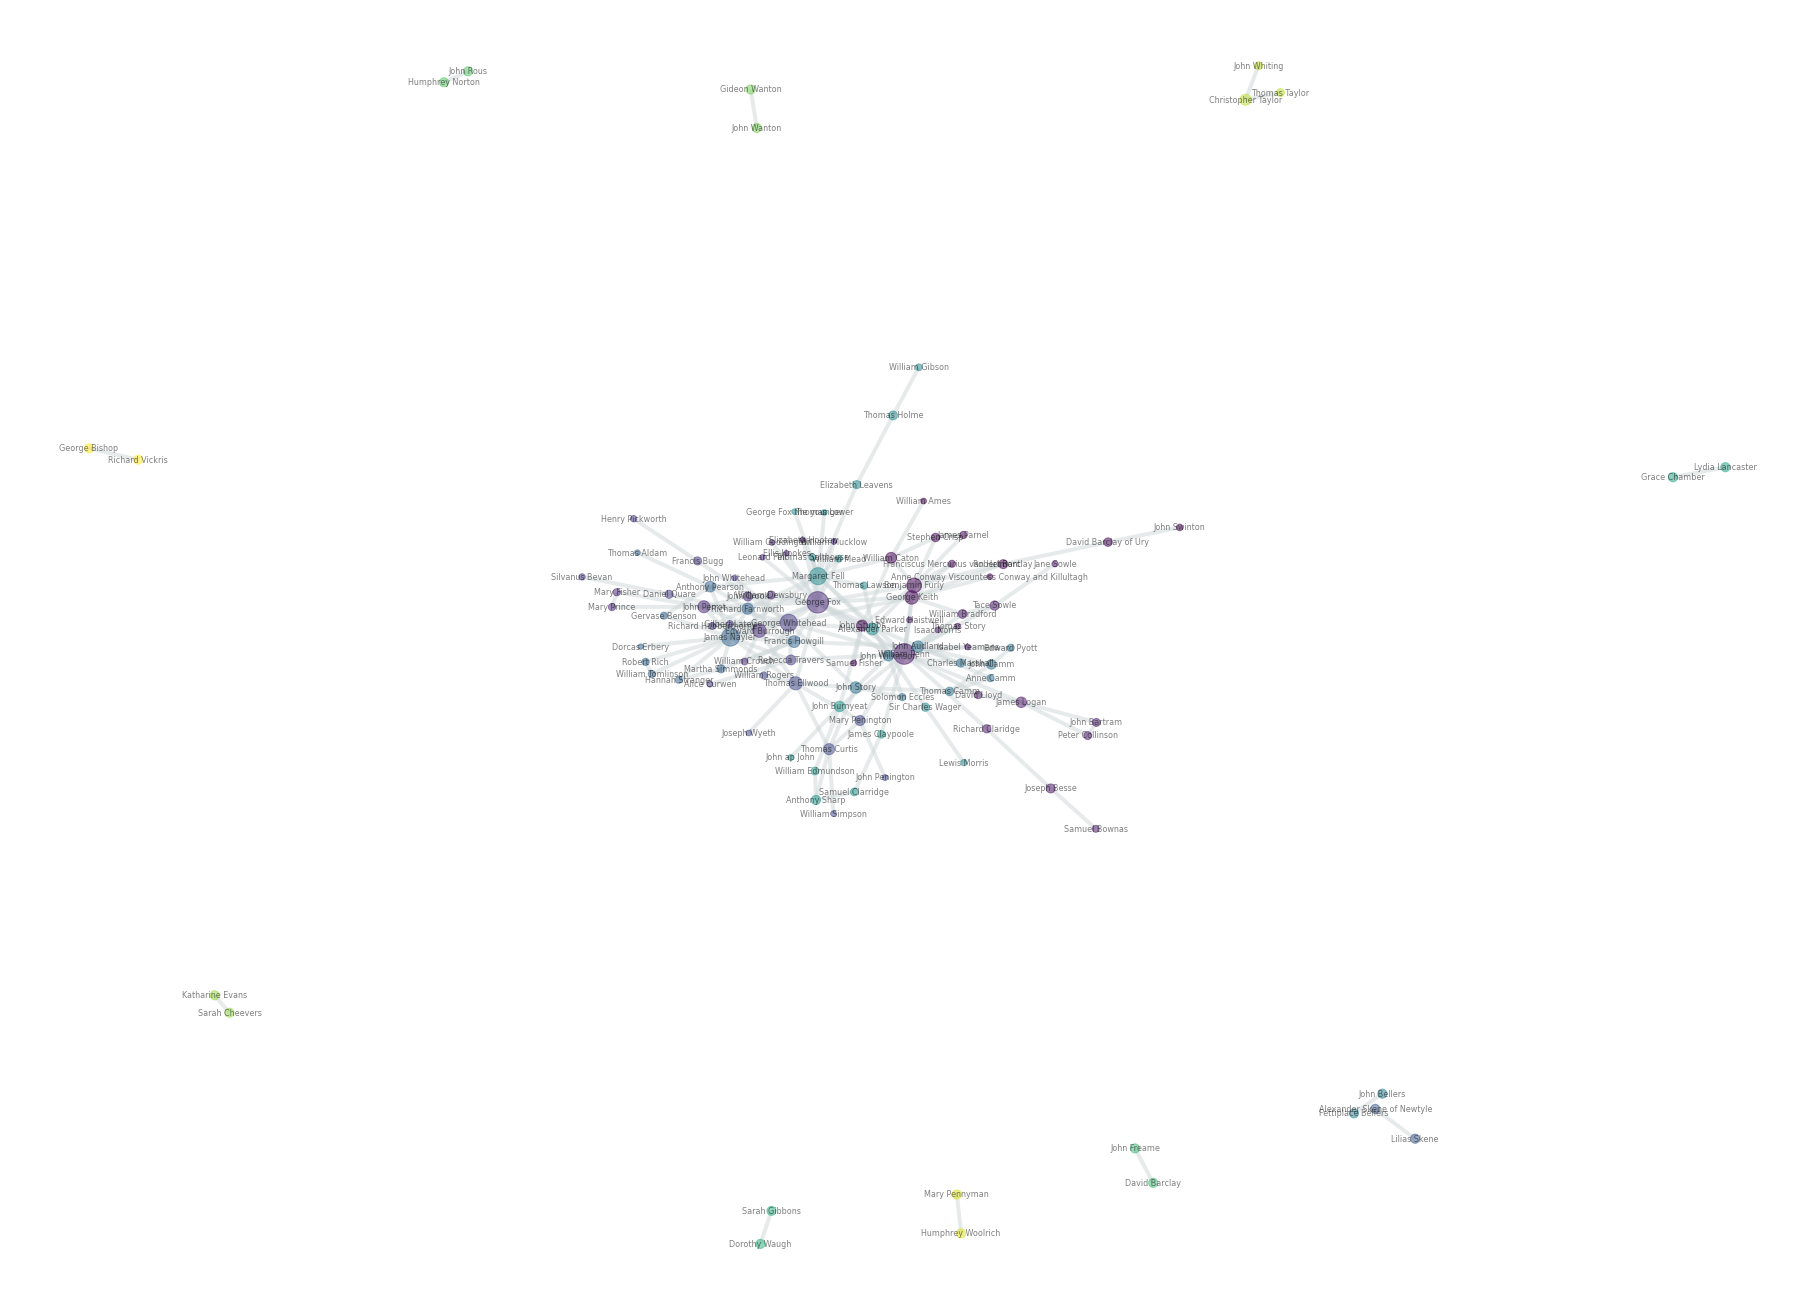

In [0]:
# Plot the the graph again with Page Rank
plt.figure(figsize=(25,18))
nx.draw(G, edge_color = '#ced7d9',width = 4, arrowsize = 30, node_color = c_values, font_size =8, 
        alpha = .5, with_labels= True, node_size = [10000*pr[n] for n in G.nodes()])

# Add attirbute

In [16]:
# Attribute enrichment of the nodes
node_attr = pd.read_csv('/content/nodelist.csv', index_col = 'Name')
node_attr


,Previous Respitory Condition,Gender,Age,ID
Name,,,,
Joseph Wyeth,0,male,83,10013191
Alexander Skene of Newtyle,1,male,92,10011149
James Logan,1,male,79,10007567
Dorcas Erbery,0,female,92,10003983
Lilias Skene,0,male,84,10011152
...,...,...,...,...
Thomas Ellwood,1,male,68,10003945
William Simpson,1,male,87,10011114
Samuel Bownas,1,male,83,10001390


In [21]:
# Add the atribute to the graph G
node_attr_d = node_attr.to_dict(orient = 'index')
nx.classes.function.set_node_attributes(G, node_attr_d)
nx.get_node_attributes(G, 'Age')

{'Alexander Parker': 71,
 'Alexander Skene of Newtyle': 92,
 'Alice Curwen': 44,
 'Anne Camm': 26,
 'Anne Conway Viscountess Conway and Killultagh': 25,
 'Anthony Pearson': 70,
 'Anthony Sharp': 49,
 'Benjamin Furly': 37,
 'Charles Marshall': 86,
 'Christopher Taylor': 85,
 'Daniel Quare': 41,
 'David Barclay': 95,
 'David Barclay of Ury': 35,
 'David Lloyd': 61,
 'Dorcas Erbery': 92,
 'Dorothy Waugh': 63,
 'Edward Burrough': 69,
 'Edward Haistwell': 75,
 'Edward Pyott': 35,
 'Elizabeth Hooten': 90,
 'Elizabeth Leavens': 35,
 'Ellis Hookes': 53,
 'Fettiplace Bellers': 69,
 'Francis Bugg': 81,
 'Francis Howgill': 83,
 'Franciscus Mercurius van Helmont': 69,
 'George Bishop': 37,
 'George Fox': 64,
 'George Fox the younger': 81,
 'George Keith': 45,
 'George Whitehead': 31,
 'Gervase Benson': 74,
 'Gideon Wanton': 65,
 'Gilbert Latey': 32,
 'Grace Chamber': 48,
 'Hannah Stranger': 83,
 'Henry Pickworth': 87,
 'Humphrey Norton': 53,
 'Humphrey Woolrich': 25,
 'Isaac Norris': 96,
 'Isabel 